# Some useful functions

In [16]:
from __future__ import print_function
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

In [13]:
import util
import imp
imp.reload(util)

<module 'util' from 'C:\\Users\\Yimeng\\Documents\\GitHub\\LabWork\\util.py'>

In [14]:
data_paths, all_regions = util.load_paths()

In [15]:
all_regions

{'bp': ['0', '1', '2', '3', '4', '6', '7'],
 'cc': ['0', '1', '2', '3', '4', '6', '7', '9'],
 'ht': ['0', '1', '3', '4', '7', '8', '9'],
 'jc': ['0', '1', '2', '3', '4', '6', '7', '8'],
 'jp': ['0', '1', '4', '5', '6', '7', '8', '9'],
 'wc': ['0', '1', '2', '3', '4', '6', '7', '8', '9'],
 'wm': ['0', '1', '2', '5', '6', '7'],
 'zt': ['0', '1', '3', '4', '6', '7', '8']}

# Load behavior data

In [25]:
df = pd.read_csv('behavior_all.csv',index_col=0)

In [26]:
df.head()

cue_end  cue_start  delay_end  delay_start  duration  finger  move_end  \
0     9079       7079      680.0       1160.0    1520.0     5.0    9759.0   
1    13079      11079      640.0        840.0    1800.0     5.0   13719.0   
2    17079      15079      400.0        720.0    1680.0     5.0   17479.0   
3    21079      19079      600.0        800.0    1800.0     1.0   21679.0   
4    25079      23079      560.0        880.0    1680.0     5.0   25639.0   

   move_start subject  
0      8239.0      bp  
1     11919.0      bp  
2     15799.0      bp  
3     19879.0      bp  
4     23959.0      bp

In [30]:
# Only look at behavior for one subj
subj = 'bp'
dfbp = df[df['subject']=='bp']
#dfbp[(dfbp['delay_start']<2000) & (dfbp['delay_end']<1500)]

cue_end  cue_start  delay_end  delay_start  duration  finger  move_end  \
0       9079       7079      680.0       1160.0    1520.0     5.0    9759.0   
1      13079      11079      640.0        840.0    1800.0     5.0   13719.0   
2      17079      15079      400.0        720.0    1680.0     5.0   17479.0   
3      21079      19079      600.0        800.0    1800.0     1.0   21679.0   
4      25079      23079      560.0        880.0    1680.0     5.0   25639.0   
5      29079      27079      240.0       1160.0    1080.0     2.0   29319.0   
6      33079      31079      840.0       1440.0    1400.0     3.0   33919.0   
7      37079      35079       80.0        640.0    1440.0     4.0   37159.0   
8      41079      39079      760.0       1000.0    1760.0     1.0   41839.0   
9      45079      43079      760.0       1040.0    1720.0     1.0   45839.0   
10     49079      47079      960.0       1120.0    1840.0     1.0   50039.0   
11     53079      51079      480.0       1000.0    1480.0     5.0   53559.0   
12     57079      55079      480.0       1000.0    1480.0     2.0   57559.0   
14     65079      63079      600.0       1320.0    1280.0     3.0   65679.0   
15     69079      67079      640.0       1040.0    1600.0     2.0   69719.0   
17     77079      75079      280.0        920.0    1360.0     5.0   77359.0   
18     81079      79079      600.0       1040.0    1560.0     2.0   81679.0   
19     85079      83079      320.0       1040.0    1280.0     2.0   85399.0   
21     93079      91079      520.0        840.0    1680.0     1.0   93599.0   
22     97079      95079      840.0       1680.0    1160.0     4.0   97919.0   
23    101079      99079      520.0       1240.0    1280.0     3.0  101599.0   
24    105079     103079      600.0        880.0    1720.0     1.0  105679.0   
25    109079     107079      560.0       1080.0    1480.0     4.0  109639.0   
26    113079     111079     1000.0       1120.0    1880.0     1.0  114079.0   
27    117079     115079      480.0       1280.0    1200.0     3.0  117559.0   
28    121079     119079     1320.0        840.0    2480.0     3.0  122399.0   
29    125079     123079      840.0        920.0    1920.0     1.0  125919.0   
30    129079     127079      480.0       1000.0    1480.0     4.0  129559.0   
33    141079     139079     1480.0        880.0    2600.0     5.0  142559.0   
34    145079     143079      640.0       1120.0    1520.0     2.0  145719.0   
..       ...        ...        ...          ...       ...     ...       ...   
116   473079     471079       80.0        880.0    1200.0     5.0  473159.0   
117   477079     475079      760.0        920.0    1840.0     4.0  477839.0   
118   481079     479079       80.0        880.0    1200.0     4.0  481159.0   
119   485079     483079     1200.0       1080.0    2120.0     5.0  486279.0   
120   489079     487079     1200.0       1040.0    2160.0     5.0  490279.0   
121   493079     491079      840.0       1040.0    1800.0     4.0  493919.0   
122   497079     495079     1280.0       1880.0    1400.0     1.0  498359.0   
123   501079     499079      400.0        800.0    1600.0     1.0  501479.0   
124   505079     503079      960.0       1000.0    1960.0     2.0  506039.0   
126   513079     511079       80.0        800.0    1280.0     5.0  513159.0   
127   517079     515079      200.0        800.0    1400.0     1.0  517279.0   
128   521079     519079      360.0        920.0    1440.0     2.0  521439.0   
129   525079     523079      160.0       1000.0    1160.0     3.0  525239.0   
130   529079     527079      320.0        920.0    1400.0     5.0  529399.0   
131   533079     531079      600.0       1120.0    1480.0     5.0  533679.0   
132   537079     535079      400.0        960.0    1440.0     1.0  537479.0   
133   541079     539079      160.0        600.0    1560.0     1.0  541239.0   
134   545079     543079      680.0       1040.0    1640.0     1.0  545759.0   
135   549079     547079     1160.0       1120.0    2040

In [32]:
x = np.load(data_paths['bp']['1'][0])

# Define time series (Fs = 1000Hz)
Fs = 1000.
N_samples = len(x)
t_max = N_samples/float(Fs)
t = np.arange(0,t_max,1/float(Fs))

[  0.00000000e+00   1.00000000e-03   2.00000000e-03 ...,   6.10037000e+02
   6.10038000e+02   6.10039000e+02]


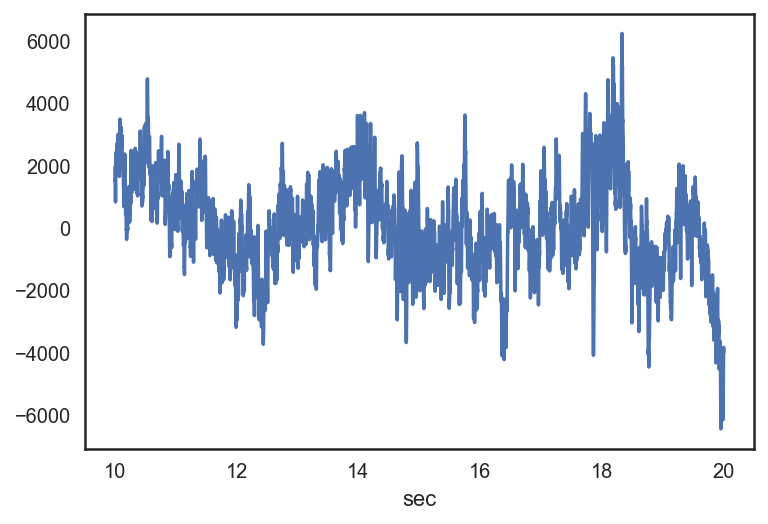

In [37]:
# Define samples of interest
trange = (10,20)
samps = np.argwhere(np.logical_and(t >= trange[0], t < trange[1]))
plt.plot(t[samps], x[samps])
plt.xlabel('sec')